# Logistic Regression

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer

Reading unmodified data

In [2]:
df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with lbfgs solver: 0.7672316384180791
Accuracy with newton-cg solver: 0.7740112994350282
Accuracy with newton-cholesky solver: 0.7740112994350282
Accuracy with sag solver: 0.7367231638418079
Accuracy with saga solver: 0.7265536723163842


/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with lbfgs solver and L2 penalty: 0.7672316384180791
Accuracy with newton-cg solver and L2 penalty: 0.7740112994350282
Accuracy with newton-cholesky solver and L2 penalty: 0.7740112994350282
Accuracy with sag solver and L2 penalty: 0.7367231638418079
Accuracy with saga solver and L2 penalty: 0.7265536723163842


/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with lbfgs solver and fit_intercept=False: 0.7661016949152543
Accuracy with newton-cg solver and fit_intercept=False: 0.7638418079096045
Accuracy with newton-cholesky solver and fit_intercept=False: 0.7638418079096045
Accuracy with sag solver and fit_intercept=False: 0.7367231638418079
Accuracy with saga solver and fit_intercept=False: 0.7265536723163842


/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://sci

Accuracy with lbfgs solver: 0.7706214689265537
Accuracy with newton-cg solver: 0.7740112994350282
Accuracy with newton-cholesky solver: 0.7740112994350282
Accuracy with sag solver: 0.7378531073446327
Accuracy with saga solver: 0.7231638418079096
Saved figure to ../Figures/logistic_regression_accuracies_1.png


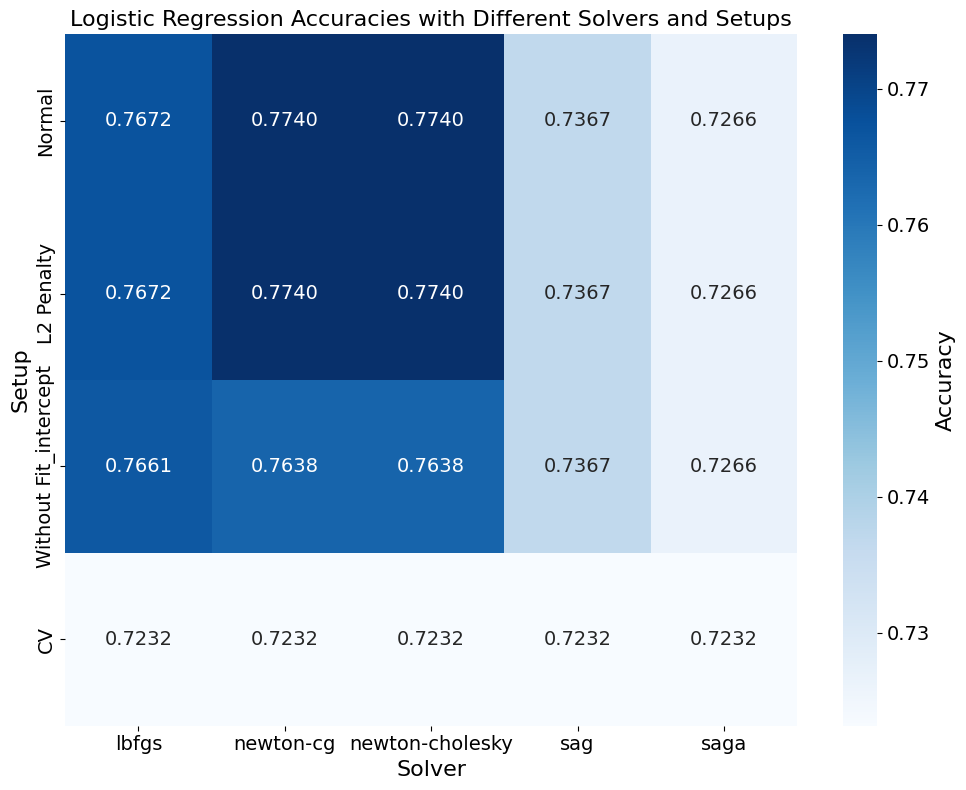

In [3]:
# Unmodified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Unmodified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Unmodified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Unmodified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Normal', 'L2 Penalty', 'Without Fit_intercept', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_1.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Reading modified data (Ordinal encoder for categories)

In [4]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder() # This limit gave best results
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

Accuracy with lbfgs solver: 0.7649717514124293
Accuracy with newton-cg solver: 0.7649717514124293
Accuracy with newton-cholesky solver: 0.7649717514124293
Accuracy with sag solver: 0.7672316384180791
Accuracy with saga solver: 0.7615819209039548
Accuracy with lbfgs solver and L2 penalty: 0.7649717514124293
Accuracy with newton-cg solver and L2 penalty: 0.7649717514124293
Accuracy with newton-cholesky solver and L2 penalty: 0.7649717514124293
Accuracy with sag solver and L2 penalty: 0.7672316384180791
Accuracy with saga solver and L2 penalty: 0.7615819209039548
Accuracy with lbfgs solver and fit_intercept=False: 0.7661016949152543
Accuracy with newton-cg solver and fit_intercept=False: 0.7661016949152543
Accuracy with newton-cholesky solver and fit_intercept=False: 0.7661016949152543
Accuracy with sag solver and fit_intercept=False: 0.7672316384180791
Accuracy with saga solver and fit_intercept=False: 0.7615819209039548
Accuracy with lbfgs solver: 0.7649717514124293
Accuracy with newton

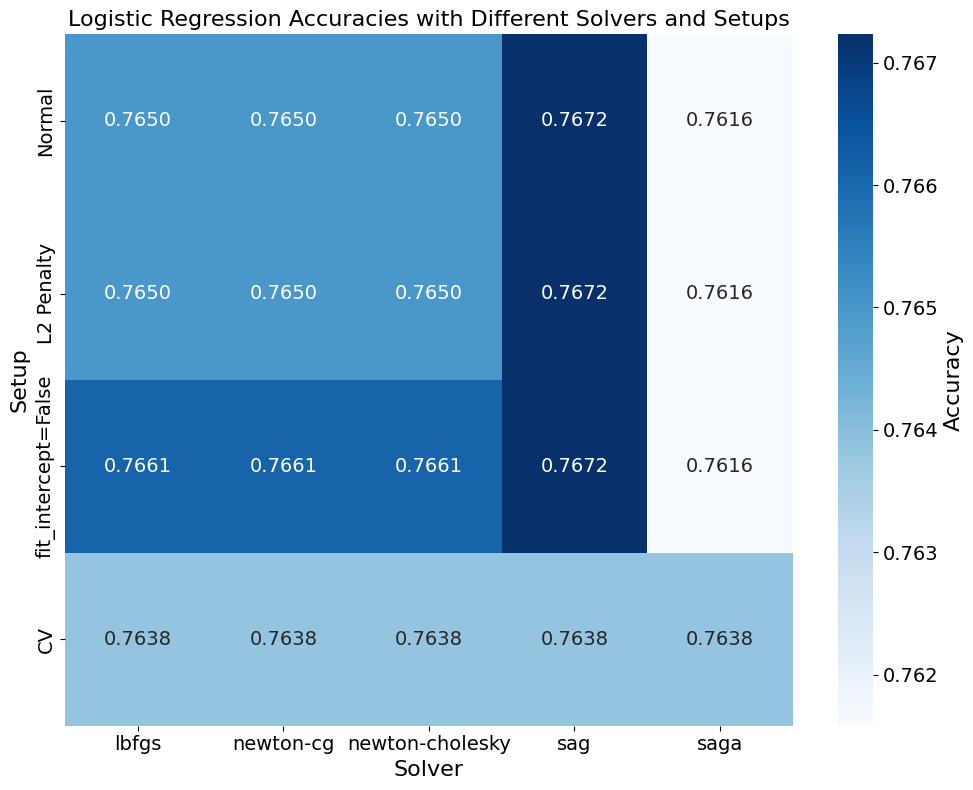

In [5]:
# Modified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Modified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Modified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Modified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Normal', 'L2 Penalty', 'fit_intercept=False', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_2.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Reading modified data (OneHotEncoder for all features)

In [6]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X).toarray(), columns=encoder.get_feature_names_out(X.columns))
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

In [ ]:
# Modified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Modified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Modified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Modified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Normal', 'L2 Penalty', 'fit_intercept=False', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_3.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Reading modified data (OneHotEncoder for categories)

In [2]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

Accuracy with lbfgs solver: 0.7751412429378531
Accuracy with newton-cg solver: 0.7740112994350282
Accuracy with newton-cholesky solver: 0.7740112994350282
Accuracy with sag solver: 0.7751412429378531
Accuracy with saga solver: 0.7740112994350282
Accuracy with lbfgs solver and L2 penalty: 0.7751412429378531
Accuracy with newton-cg solver and L2 penalty: 0.7740112994350282
Accuracy with newton-cholesky solver and L2 penalty: 0.7740112994350282
Accuracy with sag solver and L2 penalty: 0.7751412429378531
Accuracy with saga solver and L2 penalty: 0.7740112994350282
Accuracy with lbfgs solver and fit_intercept=False: 0.7774011299435029
Accuracy with newton-cg solver and fit_intercept=False: 0.7774011299435029
Accuracy with newton-cholesky solver and fit_intercept=False: 0.7774011299435029
Accuracy with sag solver and fit_intercept=False: 0.7751412429378531
Accuracy with saga solver and fit_intercept=False: 0.7740112994350282
Accuracy with lbfgs solver: 0.7751412429378531
Accuracy with newton

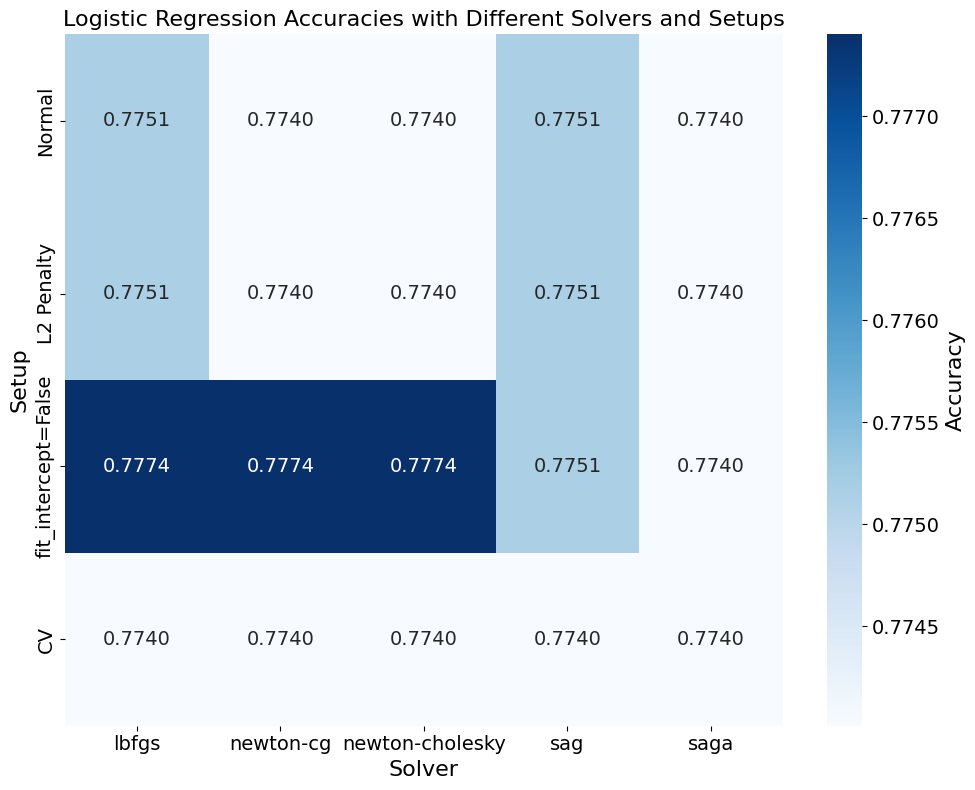

In [3]:
# Modified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Modified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Modified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Modified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Normal', 'L2 Penalty', 'fit_intercept=False', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_4.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

Reading modified data (OneHotEncoder for some categories and Scaling for numerical ones)

In [4]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Testing different solvers, l2 regularization, fit_intercept equal to False and Cross-validation equal to 5

Accuracy with lbfgs solver: 0.7751412429378531
Accuracy with newton-cg solver: 0.7740112994350282
Accuracy with newton-cholesky solver: 0.7740112994350282
Accuracy with sag solver: 0.7762711864406779
Accuracy with saga solver: 0.7762711864406779
Accuracy with lbfgs solver and L2 penalty: 0.7751412429378531
Accuracy with newton-cg solver and L2 penalty: 0.7740112994350282
Accuracy with newton-cholesky solver and L2 penalty: 0.7740112994350282
Accuracy with sag solver and L2 penalty: 0.7762711864406779
Accuracy with saga solver and L2 penalty: 0.7762711864406779
Accuracy with lbfgs solver and fit_intercept=False: 0.7774011299435029
Accuracy with newton-cg solver and fit_intercept=False: 0.7785310734463277
Accuracy with newton-cholesky solver and fit_intercept=False: 0.7774011299435029
Accuracy with sag solver and fit_intercept=False: 0.7774011299435029
Accuracy with saga solver and fit_intercept=False: 0.7774011299435029
Accuracy with lbfgs solver: 0.7728813559322034
Accuracy with newton

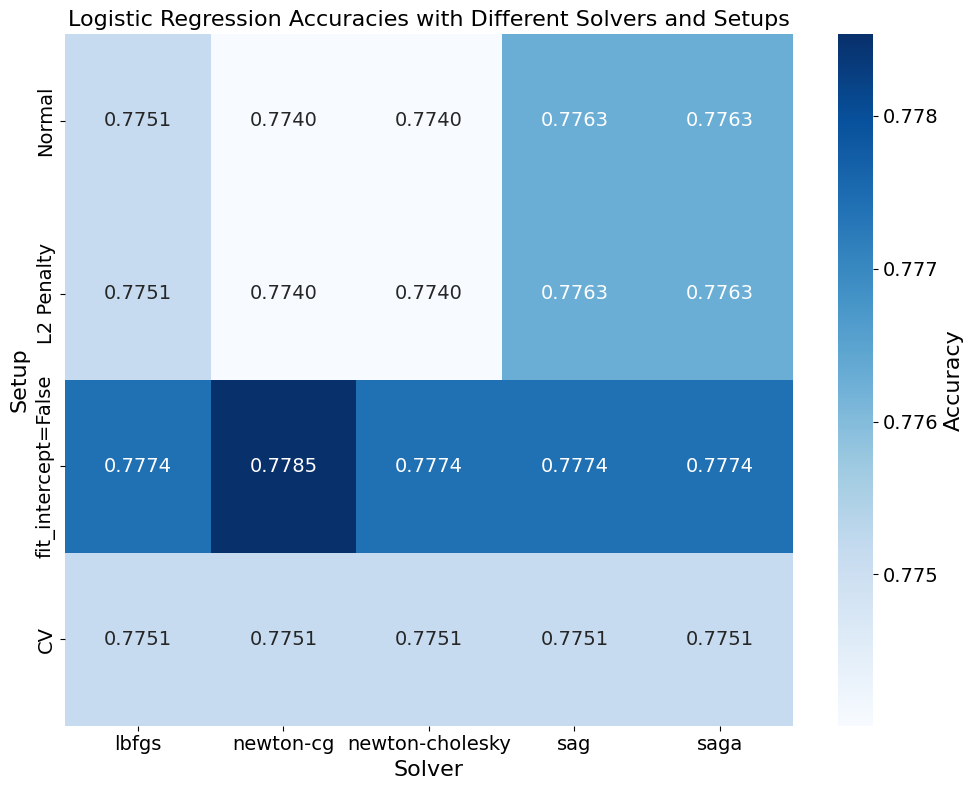

In [5]:
# Modified data with various solvers
acuracies = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000)
    logreg.fit(X_train, y_train)
    acuracies[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver:", acuracies[solver])

# Modified data with various solvers and L2 penalty
acuracies_l2 = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, penalty='l2')
    logreg.fit(X_train, y_train)
    acuracies_l2[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and L2 penalty:", acuracies_l2[solver])

# Modified data with various solvers and fit_intercept=False
accuracies_fit_intercept = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegression(solver=solver, max_iter=10000, fit_intercept=False)
    logreg.fit(X_train, y_train)
    accuracies_fit_intercept[solver] = logreg.score(X_test, y_test)
    print(f"Accuracy with {solver} solver and fit_intercept=False:", accuracies_fit_intercept[solver])

# Modified data with various solvers and Cross-Validation
acuracies_cv = {}
for solver in ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:  #   liblinear doesnt allow for multinomial
    logreg = LogisticRegressionCV(solver=solver, max_iter=10000, cv=5)
    logreg.fit(X_train, y_train)
    print(f"Accuracy with {solver} solver:", logreg.score(X_test, y_test))

# Prepare data for heatmap
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
setups = ['Normal', 'L2 Penalty', 'fit_intercept=False', 'CV']

# Create matrix to store accuracies
accuracy_matrix = np.array([
    [acuracies[solver] for solver in solvers],
    [acuracies_l2[solver] for solver in solvers],
    [accuracies_fit_intercept[solver] for solver in solvers],
    [logreg.score(X_test, y_test) for solver in solvers]  # CV scores
])

# Plot heatmap with reduced heatmap space
fig, ax = plt.subplots(figsize=(10, 8))
hm2 = sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', cmap='Blues', 
            annot_kws={'fontsize':14},
            xticklabels=solvers, yticklabels=setups, 
            ax=ax, cbar=True)
ax.tick_params(axis='both', which='major', labelsize=14)
if hasattr(hm2, "collections") and hm2.collections:
    cbar2 = hm2.collections[0].colorbar
    if cbar2 is not None:
        cbar2.ax.tick_params(labelsize=14)
        cbar2.set_label('Accuracy', fontsize=16)

ax.set_xlabel('Solver', fontsize=16)
ax.set_ylabel('Setup', fontsize=16)
ax.set_title('Logistic Regression Accuracies with Different Solvers and Setups', fontsize=16)
plt.tight_layout()
os.makedirs('../Figures', exist_ok=True)
outpath = os.path.join('..', 'Figures', 'logistic_regression_accuracies_5.png')
fig.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
print("Saved figure to", outpath)
plt.show()

# More tests

In [ ]:
# Preprocessing raw data - ordinal encoder and max categories

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder(max_categories=20) # This limit gave best results
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7627118644067796


In [ ]:
# Preprocessing raw data - one hot encoder

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X).toarray(), columns=encoder.get_feature_names_out(X.columns))
#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X.toarray(), columns=preprocessor.get_feature_names_out())
#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7389830508474576
Accuracy: 0.7661016949152543


In [ ]:
# Preprocessing raw data - ordinal encoder and l2 regularization

df = pd.read_csv("../Data/data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder()
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2')
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7627118644067796


/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Preprocessing adjusted data - ordinal encoder

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder()
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7649717514124293


In [ ]:
# Preprocessing adjusted data - one hot encoder

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X).toarray(), columns=encoder.get_feature_names_out(X.columns))
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy with OneHotEncoder on all features:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy with OneHotEncoder on some features:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy with StandardScaler and OneHotEncoder on some features:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))


df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = RobustScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy with RobustScaler and OneHotEncoder on some features:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy with OneHotEncoder on all features: 0.7423728813559322
Accuracy with OneHotEncoder on some features: 0.7751412429378531
Accuracy with StandardScaler and OneHotEncoder on some features: 0.7751412429378531
Accuracy with RobustScaler and OneHotEncoder on some features: 0.7774011299435029


In [ ]:
# Preprocessing adjusted data - ordinal encoder and l2 regularization

df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
encoder = OrdinalEncoder()
encoder.fit(X)
X = pd.DataFrame(encoder.transform(X), columns=X.columns)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# specify multinomial for multiclass and increase max_iter if needed
logreg = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2')
logreg.fit(X_train, y_train)
# evaluate
print("Accuracy:", logreg.score(X_test, y_test))
#print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7649717514124293


Cross-validation scores: [0.78651685 0.78651685 0.75280899 0.73033708 0.71910112 0.81818182
 0.71590909 0.71590909 0.79545455 0.75      ]
Mean CV accuracy: 0.7571
Test set accuracy with Logistic Regression: 0.7650


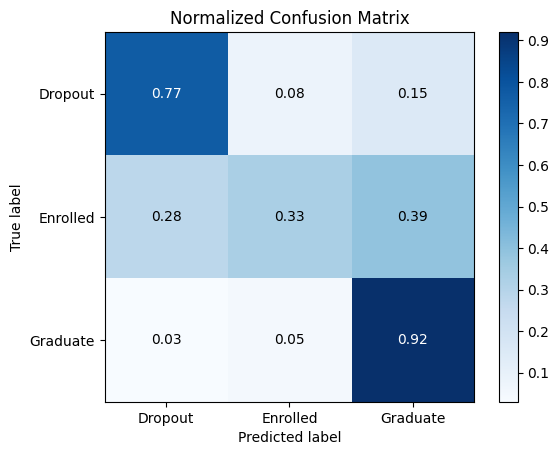

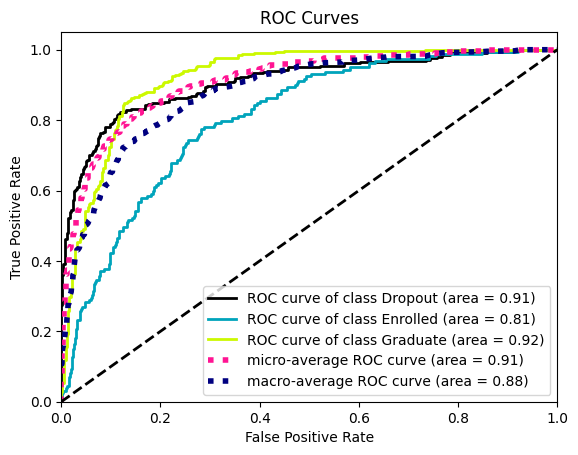

<Figure size 640x480 with 0 Axes>

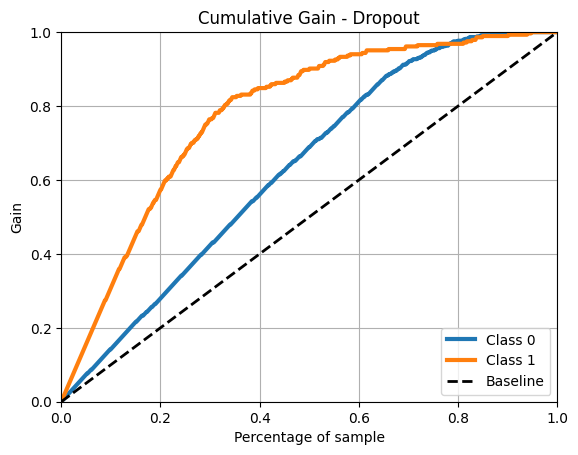

<Figure size 640x480 with 0 Axes>

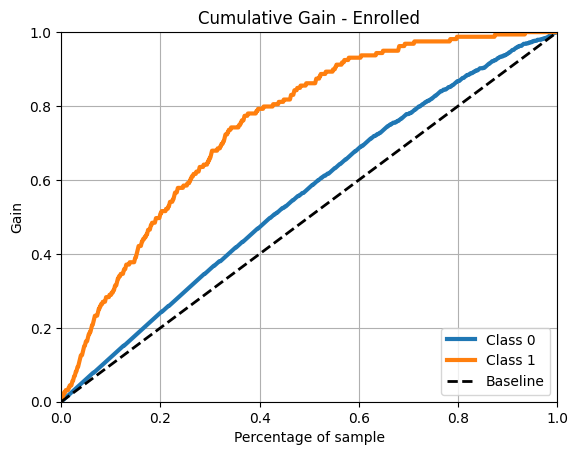

<Figure size 640x480 with 0 Axes>

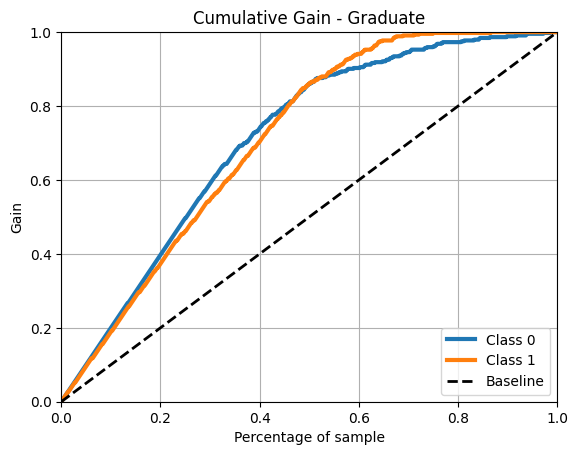

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scikitplot as skplt
from sklearn.preprocessing import label_binarize

# Cross validation
accuracy = cross_validate(logreg, X_test, y_test, cv=10)['test_score']
print("Cross-validation scores:", accuracy)
print("Mean CV accuracy: {:.4f}".format(accuracy.mean()))
print("Test set accuracy with Logistic Regression: {:.4f}".format(logreg.score(X_test, y_test)))

# Confusion matrix
y_pred = logreg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

# ROC curve
y_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

# One-vs-All cumulative gain plots for multiclass
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

for i, class_name in enumerate(classes):
    # Create binary probability array for this class: [prob_not_class, prob_class]
    probs_binary = np.vstack([1 - y_probas[:, i], y_probas[:, i]]).T
    plt.figure()
    skplt.metrics.plot_cumulative_gain(y_test_bin[:, i], probs_binary)
    plt.title(f'Cumulative Gain - {class_name}')
    plt.show()

In [ ]:
# Adjusted data + OrdinalEncoder + L2-regularized LogisticRegression with cross-validation


# load adjusted data
df_adj = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X_adj = df_adj.drop("Target", axis=1)
y_adj = df_adj["Target"]

# ordinal encode all features (as done in prior cells)
encoder_adj = OrdinalEncoder()
X_enc = pd.DataFrame(encoder_adj.fit_transform(X_adj), columns=X_adj.columns)

# train/test split (stratify to preserve class proportions)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(
    X_enc, y_adj, test_size=0.2, random_state=42, stratify=y_adj
)

# logistic regression with L2 (default) and multinomial for multiclass
lr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, multi_class='multinomial')

# grid search over inverse regularization strength C, using stratified k-fold CV
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(lr, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# fit grid on training portion
grid.fit(X_train_cv, y_train_cv)

# report CV results and evaluate on held-out test set
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

y_pred = grid.predict(X_test_cv)
print("Test accuracy:", accuracy_score(y_test_cv, y_pred))
print("\nClassification report:\n", classification_report(y_test_cv, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test_cv, y_pred))

/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/manuela/miniconda3/envs/fys-course/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/manuela/miniconda3/envs/fys-course/lib/python3.10

Best params: {'C': 0.1}
Best CV accuracy: 0.7688586292043247
Test accuracy: 0.7694915254237288

Classification report:
               precision    recall  f1-score   support

     Dropout       0.79      0.78      0.78       284
    Enrolled       0.55      0.31      0.40       159
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885


Confusion matrix:
 [[221  21  42]
 [ 47  50  62]
 [ 12  20 410]]
